# **Dataset Directory**

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
train_dir = "D:/ResearchWork/Covid-19/data/train"
test_dir = "D:/ResearchWork/Covid-19/data/Test"

# **Import**

In [3]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix
# vgg16
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
# inceptionv3
from tensorflow.python.keras.applications.inception_v3 import InceptionV3 
from tensorflow.python.keras.applications.inception_v3  import preprocess_input, decode_predictions
# resnet50
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.applications.resnet import preprocess_input, decode_predictions
#Ensemble Model
from tensorflow import keras
from tensorflow.keras import layers

# **Useful Functions**

In [4]:
def transferLayer(model,layer):
  conv_model = Model(inputs=model.input, outputs=layer.output)   
  # Start a new Keras Sequential model.
  new_model = Sequential()

  # Add the convolutional part of the VGG16 model from above.
  new_model.add(conv_model)

  # Flatten the output of the VGG16 model because it is from a convolutional layer.
  new_model.add(Flatten())

  # Add a dense (aka. fully-connected) layer.
  # This is for combining features that the VGG16 model has recognized in the image.
  new_model.add(Dropout(0.5))

  new_model.add(Dense(512, activation='relu'))

  # Add the final layer for the actual classification.
  new_model.add(Dense(2, activation='softmax'))

  return new_model

def trainableLayers(model):
  for i in range(len(list(model.layers))):
    print(list(model.layers)[i].name)
  return list(model.layers)[-1].name

def history(model,generator_train,generator_val):
  optimizer = Adam(lr=1e-5)
  loss = 'categorical_crossentropy'
  metrics = ['categorical_accuracy']
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  epochs = 40
  steps_per_epoch = (generator_train.n/batch_size)/3
  steps_val=generator_val.n/batch_size
  history = model.fit_generator(generator=generator_train,
                                    epochs=epochs,
                                    steps_per_epoch=steps_per_epoch,
                                    validation_data=generator_val,
                                    validation_steps=steps_val)  
  return history
  
def plotmodel(model):
  return tf.keras.utils.plot_model(
    model,
    dpi=96,
)

In [5]:
input_shape=(224,224)

# **ImageDataGenerator**

In [6]:
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)
batch_size = 8
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 9672 images belonging to 2 classes.
Found 4136 images belonging to 2 classes.


# Graph Plotting

In [27]:
def plotGraph(model_name,history):
    
    #Saving Paths
    path="D:/ResearchWork/Covid-19/Diagrams/Graphs/"
    train_path=path+model_name+"/Training Curve of "+model_name+".png"
    validation_path=path+model_name+"/Validation Curve of "+model_name+".png"
    
    #Training Curve
    plt.grid()
    plt.plot(history.history['loss'])
    plt.plot(history.history['categorical_accuracy'])
    plt.title('Training Curve of '+model_name)
    plt.ylabel('Rate')
    plt.xlabel('epoch')
    plt.legend(['Loss', 'Accuracy'], loc='right')
    plt.savefig(train_path,dpi=600,bbox_inches = 'tight')
    plt.show()
    
    #Validation Curve
    plt.grid()
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Validation Curve of '+model_name)
    plt.ylabel('Rate')
    plt.xlabel('epoch')
    plt.legend(['Loss', 'Accuracy'], loc='right')
    plt.savefig(validation_path,dpi=600,bbox_inches = 'tight')
    plt.show()

# Save History to CSV

In [30]:
def history_to_CSV(model,h):
    path="D:/ResearchWork/Covid-19/Excel_result/"+model+".csv"
    his=h.history
    data=pd.DataFrame.from_dict(his)
    data.to_csv(path)

# Confusion Matrix & Classification Report

In [34]:
def generate_report(model_name,model):
    path="D:/ResearchWork/Covid-19/Diagrams/confusion_matrix/"+model_name+".jpeg"
    Y_pred = model.predict_generator(generator_test, generator_test.samples // generator_test.batch_size)
    y_pred = np.argmax(Y_pred, axis=1)
    confusionMatrix=confusion_matrix(generator_test.classes, y_pred)
    fig, ax = plt.subplots(figsize=(6.5,6))
    sns_plot=sns.heatmap(confusionMatrix, annot=True, ax=ax, fmt='g')
    ax.xaxis.set_ticklabels(['Normal', 'Affected']) 
    ax.yaxis.set_ticklabels(['Normal', 'Affected'])
    plt.savefig(path,dpi=400,bbox_inches = 'tight')
    target_names = ['Normal','Affected']
    print('Classification Report')
    cr=classification_report(generator_test.classes, y_pred, target_names=target_names, digits=4)
    print(cr)
    text_path="D:/ResearchWork/Covid-19/Classification report/"+model_name+".txt"
    text_file = open(text_path, "w")
    text_file.write(cr)
    text_file.close()

# **VGG16**

In [10]:
model1 = VGG16(include_top=False,input_shape=(224, 224, 3), weights='imagenet')
l1=trainableLayers(model1)
print("Last Layer : "+l1)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
Last Layer : block5_pool


In [11]:
layer1 = model1.get_layer(l1)
vgg16=transferLayer(model1,layer1)

In [12]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 27,561,282
Trainable params: 27,561,282
Non-trainable params: 0
_________________________________________________________________


# Cross Validation-Vgg16

In [13]:
h1=history(vgg16,generator_train,generator_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
403/403 [==============================] - ETA: 0s - loss: 0.2399 - categorical_accuracy: 0.9045

KeyboardInterrupt: 

In [13]:
history_to_CSV("vgg16",h1)

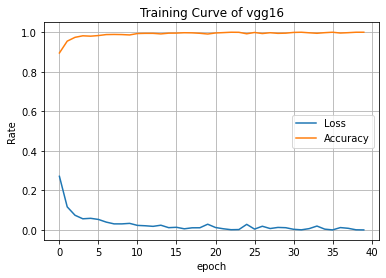

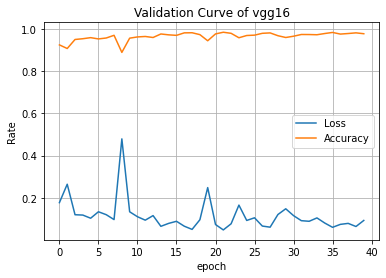

In [14]:
plotGraph("vgg16",h1)

C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal     0.9750    0.9957    0.9853      3054
    Affected     0.9872    0.9279    0.9566      1082

    accuracy                         0.9780      4136
   macro avg     0.9811    0.9618    0.9710      4136
weighted avg     0.9782    0.9780    0.9778      4136



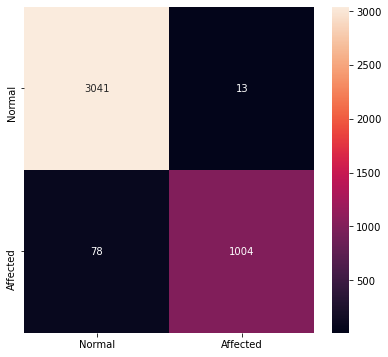

In [15]:
generate_report("vgg16",vgg16)

# **Inception V3**


In [14]:
model3 = InceptionV3(include_top=False,input_shape=(224, 224, 3), weights='imagenet')
l3=trainableLayers(model3)
print("Last Layer : "+l3)

input_2
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
activation_12
activation_14
activation_17
activation_18
mixed1
conv2d_22
batch_normalization_22
activation_22
conv2d

In [15]:
layer3 = model3.get_layer(l3)
iv3=transferLayer(model3,layer3)
# plotmodel(iv3)

In [16]:
iv3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 48,018,722
Trainable params: 47,984,290
Non-trainable params: 34,432
_________________________________________________________________


# Cross Validation-Inceptionv3

In [19]:
h3=history(iv3,generator_train,generator_test)

Epoch 1/40


C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


403/403 [==============================] - 60s 127ms/step - loss: 0.3932 - categorical_accuracy: 0.8443 - val_loss: 0.6448 - val_categorical_accuracy: 0.7780s: 0.6295 - categorical_accuracy: 0. - ETA: 30s - loss: 0.6233 - categorical_accuracy: 0.75 - ETA: 30s - loss: 0.6153 - categorical_accuracy:  - ETA: 30s - loss: 0.6159 - categorical_accuracy:  - ETA: 29s - loss: 0.6002 - categorical_accuracy:  - ETA: 29s - loss: 0.5932 - categorical_accuracy: 0. - ETA: 28s - loss: 0.5857 - categorical_accuracy:  - ETA: 28s - loss: 0.5621 - categorical_acc - ETA: 26s - loss: 0.5539 - categorical_accuracy: 0. - ETA: 26s - loss: 0.5396 - categorical_accur - ETA: 25s - loss: 0.5372 - categorical_accur - ETA: 24s - loss: 0.5241 - cat - ETA: 22s - loss: 0.4957 - categorical_accuracy: 0. - ETA: 21s - loss: 0.4937 - categorical_accuracy: 0.805 - ETA: 21s - loss: 0.4959 - catego - ETA: 14s - loss: 0. - ETA: 8s - loss: 0.4269 - categorica - E
Epoch 2/40
403/403 [==============================] - 50s 123ms/s

In [20]:
iv3.save("H:/ResearchWork/Brain Tumor/Models/iv3.h5")

In [21]:
history_to_CSV("Inception v3",h3)

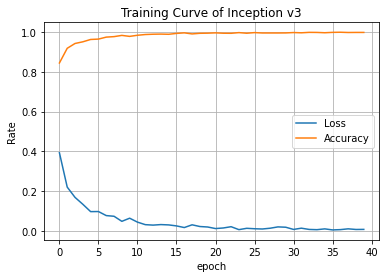

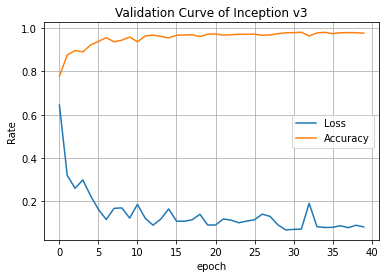

In [22]:
plotGraph("Inception v3",h3)

C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal     0.9824    0.9859    0.9841      3054
    Affected     0.9599    0.9501    0.9549      1082

    accuracy                         0.9765      4136
   macro avg     0.9711    0.9680    0.9695      4136
weighted avg     0.9765    0.9765    0.9765      4136



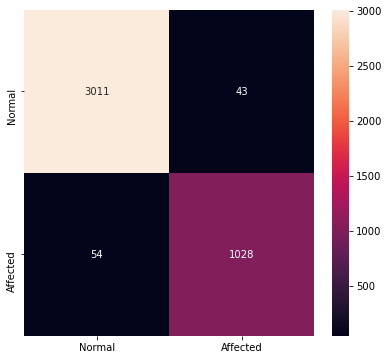

In [23]:
generate_report("Inception v3",iv3)

# **ResNet50**

In [17]:
model4 = ResNet50(include_top=False,input_shape=(224, 224, 3), weights='imagenet')
l4=trainableLayers(model4)
print("Last Layer : "+l4)

input_3
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

In [18]:
layer4 = model4.get_layer(l4)
r50=transferLayer(model4,layer4)
# plotmodel(r50)

In [19]:
r50.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 74,969,474
Trainable params: 74,916,354
Non-trainable params: 53,120
_________________________________________________________________


# Cross Validation-ResNet50

In [27]:
h4=history(r50,generator_train,generator_test)

Epoch 1/40


C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


403/403 [==============================] - 69s 156ms/step - loss: 0.3032 - categorical_accuracy: 0.9060 - val_loss: 2.9383 - val_categorical_accuracy: 0.7389
Epoch 2/40
403/403 [==============================] - 62s 154ms/step - loss: 0.1133 - categorical_accuracy: 0.9625 - val_loss: 1.4316 - val_categorical_accuracy: 0.5592
Epoch 3/40
403/403 [==============================] - 62s 154ms/step - loss: 0.0914 - categorical_accuracy: 0.9743 - val_loss: 0.4172 - val_categorical_accuracy: 0.8702
Epoch 4/40
403/403 [==============================] - 61s 152ms/step - loss: 0.0557 - categorical_accuracy: 0.9823 - val_loss: 0.2192 - val_categorical_accuracy: 0.9284
Epoch 5/40
403/403 [==============================] - 61s 152ms/step - loss: 0.0623 - categorical_accuracy: 0.9826 - val_loss: 0.1060 - val_categorical_accuracy: 0.9654
Epoch 6/40
403/403 [==============================] - 61s 152ms/step - loss: 0.0220 - categorical_accuracy: 0.9932 - val_loss: 0.0992 - val_categorical_accuracy: 0.97

In [28]:
r50.save("H:/ResearchWork/Brain Tumor/Models/r50.h5")

C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [29]:
history_to_CSV("ResNet50",h4)

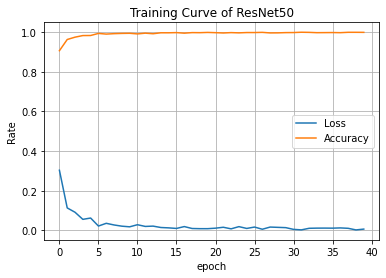

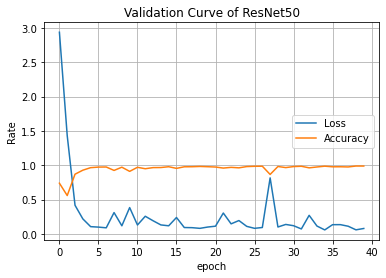

In [30]:
plotGraph("ResNet50",h4)

C:\Users\Dipto\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal     0.9886    0.9964    0.9925      3054
    Affected     0.9896    0.9677    0.9785      1082

    accuracy                         0.9889      4136
   macro avg     0.9891    0.9820    0.9855      4136
weighted avg     0.9889    0.9889    0.9888      4136



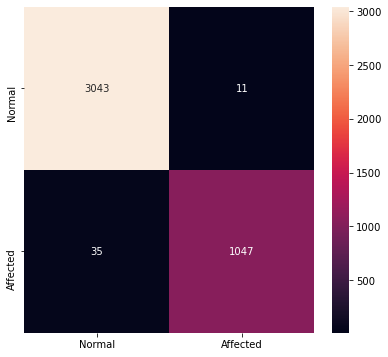

In [31]:
generate_report("ResNet50",r50)

# **Ensemble Model**

In [20]:
inputs = keras.Input(shape=(224,224,3))
models=[vgg16(inputs),r50(inputs)]
outputs = layers.average(models)
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
ensemble_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 2)            27561282    input_4[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 2)            74969474    input_4[0][0]                    
__________________________________________________________________________________________________
average (Average)               (None, 2)            0           sequential[0][0]                 
                                                                 sequential_2[0][0]    

In [22]:
h6=history(ensemble_model,generator_train,generator_test)

Epoch 1/40
403/403 [==============================] - 94s 233ms/step - loss: 0.1724 - categorical_accuracy: 0.8927 - val_loss: 0.2531 - val_categorical_accuracy: 0.7386
Epoch 2/40
403/403 [==============================] - 94s 233ms/step - loss: 0.0895 - categorical_accuracy: 0.9659 - val_loss: 0.5222 - val_categorical_accuracy: 0.7764
Epoch 3/40
403/403 [==============================] - 95s 236ms/step - loss: 0.0686 - categorical_accuracy: 0.9736 - val_loss: 0.4216 - val_categorical_accuracy: 0.6922
Epoch 4/40
403/403 [==============================] - 95s 235ms/step - loss: 0.0399 - categorical_accuracy: 0.9836 - val_loss: 0.1997 - val_categorical_accuracy: 0.9229
Epoch 5/40
403/403 [==============================] - 95s 236ms/step - loss: 0.0404 - categorical_accuracy: 0.9867 - val_loss: 0.0966 - val_categorical_accuracy: 0.9495
Epoch 6/40
403/403 [==============================] - 94s 234ms/step - loss: 0.0399 - categorical_accuracy: 0.9854 - val_loss: 0.1152 - val_categorical_acc

In [31]:
history_to_CSV("Ensemble Model",h6)

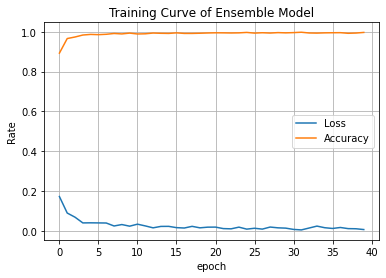

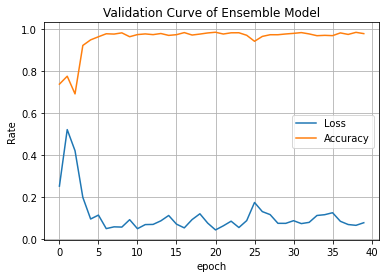

In [29]:
plotGraph("Ensemble Model",h6)

Classification Report
              precision    recall  f1-score   support

      Normal     0.9898    0.9820    0.9859      3054
    Affected     0.9503    0.9713    0.9607      1082

    accuracy                         0.9792      4136
   macro avg     0.9700    0.9767    0.9733      4136
weighted avg     0.9794    0.9792    0.9793      4136



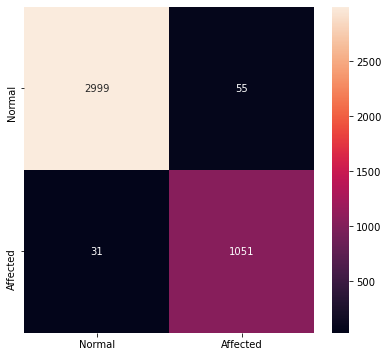

In [35]:
generate_report("Ensemble Model",ensemble_model)